In [1]:
pwd

'/Users/yaha'

In [4]:
# Importer les bibliothèques nécessaires
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

### 1. Charger le DataFrame

In [5]:
df = pd.read_csv('commerce_sales.csv')
df

,order_id,order_date,sku,color,size,unit_price,quantity,revenue
0,1,2022/6/1 16:05:00,708,Dark Blue,2XL,298,1,298
1,1,2022/6/1 16:05:00,89,Dark Blue,2XL,258,1,258
2,2,2022/6/10 17:03:00,bobo,Cream,One Size,228,1,228
3,3,2022/6/10 19:59:00,799,Dark Blue,XL,264,1,264
4,4,2022/6/11 11:42:00,799,Dark Blue,M,264,1,264
...,...,...,...,...,...,...,...,...
522,171,2022/9/9 6:27:00,799,Dark Blue,M,265,1,265
523,172,2022/9/9 7:18:00,708,Dark Blue,4XL,278,1,278
524,173,2022/9/9 7:22:00,799,Dark Blue,M,265,1,265
525,174,2022/9/9 8:25:00,799,Dark Blue,L,265,1,265


### Première étape : Analyse et nettoyage des valeurs manquantes et les doublons

Analyser la dataset pour relever les valeurs manquantes et les doublons, + mise en forme de la dataset

In [13]:
# Nombre total de doublons dans le DataFrame
duplicates_sum = df.duplicated().sum()
duplicates_sum

0

In [14]:
#Informations sur le dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   order_id    527 non-null    int64 
 1   order_date  527 non-null    object
 2   sku         527 non-null    object
 3   color       527 non-null    object
 4   size        490 non-null    object
 5   unit_price  527 non-null    int64 
 6   quantity    527 non-null    int64 
 7   revenue     527 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 33.1+ KB


#### Résumé
- Le DataFrame contient 527 entrées (lignes) numérotées de 0 à 526.
- Le DataFrame a un total de 8 colonnes, dont les noms sont "order_id", "order_date", "sku", "color", "size", "unit_price", "quantity" et "revenue".
- Les colonnes "order_id", "unit_price", "quantity" et "revenue" sont de type entier (int64).
- Les colonnes "order_date", "sku", "color" et "size" sont de type objet (string).
- Le DataFrame contient 527 valeurs non nulles (Non-Null Count) pour toutes les colonnes, sauf la colonne "size" qui contient 490 valeurs non nulles.

In [15]:
# Affichage des lignes avec des données manquantes
df[df.isnull().any(axis=1)]

,order_id,order_date,sku,color,size,unit_price,quantity,revenue
9,9,2022/6/11 22:53:00,239,Black,NaN,258,1,258
20,18,2022/6/15 13:36:00,77,B,NaN,258,1,258
21,18,2022/6/15 13:36:00,77,C,NaN,258,1,258
22,18,2022/6/15 13:36:00,77,D,NaN,258,1,258
23,18,2022/6/15 13:36:00,77,E,NaN,258,1,258
24,18,2022/6/15 13:36:00,77,A,NaN,288,1,288
66,55,2022/6/30 12:26:00,439,Rust,NaN,258,1,258
68,57,2022/6/5 7:18:00,77,B,NaN,258,1,258
81,69,2022/6/6 3:56:00,77,B,NaN,258,1,258
82,69,2022/6/6 3:56:00,77,D,NaN,258,1,258


In [16]:
# Remplissage des valeurs manquantes avec "One Size"
df['size'].fillna("One Size", inplace=True)
df.head()

,order_id,order_date,sku,color,size,unit_price,quantity,revenue
0,1,2022/6/1 16:05:00,708,Dark Blue,2XL,298,1,298
1,1,2022/6/1 16:05:00,89,Dark Blue,2XL,258,1,258
2,2,2022/6/10 17:03:00,bobo,Cream,One Size,228,1,228
3,3,2022/6/10 19:59:00,799,Dark Blue,XL,264,1,264
4,4,2022/6/11 11:42:00,799,Dark Blue,M,264,1,264


In [17]:
# Re vérifier les valeurs manquantes dans la colonne "size"
missing_values = df["size"].isna()

# Nombre total de valeurs manquantes dans la colonne "size"
total_missing_values = missing_values.sum()
total_missing_values

0

In [19]:
#Vérifier qu'il y a le même nombre de valeurs dans chaque colonne
df.count()

order_id      527
order_date    527
sku           527
color         527
size          527
unit_price    527
quantity      527
revenue       527
dtype: int64

In [20]:
df1 = df
# Création d'un dictionnaire pour mapper les anciens noms de colonnes aux nouveaux noms
nouvelles_colonnes = {
    'order_id': 'commande_id',
    'order_date': 'date_de_commande',
    'sku': 'detaillant',
    'color': 'couleur',
    'size': 'taille',
    'unit_price': 'prix_unitaire',
    'quantity': 'quantite',
    'revenue': 'CA',
    'id': 'id_client'
}

# Utilisation de la méthode rename() pour changer les noms de colonnes
df1 = df.rename(columns=nouvelles_colonnes)

#Affichage
df1

,commande_id,date_de_commande,detaillant,couleur,taille,prix_unitaire,quantite,CA
0,1,2022/6/1 16:05:00,708,Dark Blue,2XL,298,1,298
1,1,2022/6/1 16:05:00,89,Dark Blue,2XL,258,1,258
2,2,2022/6/10 17:03:00,bobo,Cream,One Size,228,1,228
3,3,2022/6/10 19:59:00,799,Dark Blue,XL,264,1,264
4,4,2022/6/11 11:42:00,799,Dark Blue,M,264,1,264
...,...,...,...,...,...,...,...,...
522,171,2022/9/9 6:27:00,799,Dark Blue,M,265,1,265
523,172,2022/9/9 7:18:00,708,Dark Blue,4XL,278,1,278
524,173,2022/9/9 7:22:00,799,Dark Blue,M,265,1,265
525,174,2022/9/9 8:25:00,799,Dark Blue,L,265,1,265


In [21]:
df2 = df1
# Convertir la colonne "order_date" en type datetime
df2['date_de_commande'] = pd.to_datetime(df2['date_de_commande'])
df2


,commande_id,date_de_commande,detaillant,couleur,taille,prix_unitaire,quantite,CA
0,1,2022-06-01 16:05:00,708,Dark Blue,2XL,298,1,298
1,1,2022-06-01 16:05:00,89,Dark Blue,2XL,258,1,258
2,2,2022-06-10 17:03:00,bobo,Cream,One Size,228,1,228
3,3,2022-06-10 19:59:00,799,Dark Blue,XL,264,1,264
4,4,2022-06-11 11:42:00,799,Dark Blue,M,264,1,264
...,...,...,...,...,...,...,...,...
522,171,2022-09-09 06:27:00,799,Dark Blue,M,265,1,265
523,172,2022-09-09 07:18:00,708,Dark Blue,4XL,278,1,278
524,173,2022-09-09 07:22:00,799,Dark Blue,M,265,1,265
525,174,2022-09-09 08:25:00,799,Dark Blue,L,265,1,265


In [22]:
# Extraire la date et l'heure dans des colonnes distinctes
df2['date'] = df2['date_de_commande'].dt.date
df2['heure'] = df2['date_de_commande'].dt.time

# Supprimer la colonne 'order_date'
#df3 = df2.drop('date_de_commande', axis=1)

# Afficher le DataFrame avec les colonnes "date" et "heure" ajoutées
df2.head()

,commande_id,date_de_commande,detaillant,couleur,taille,prix_unitaire,quantite,CA,date,heure
0,1,2022-06-01 16:05:00,708,Dark Blue,2XL,298,1,298,2022-06-01,16:05:00
1,1,2022-06-01 16:05:00,89,Dark Blue,2XL,258,1,258,2022-06-01,16:05:00
2,2,2022-06-10 17:03:00,bobo,Cream,One Size,228,1,228,2022-06-10,17:03:00
3,3,2022-06-10 19:59:00,799,Dark Blue,XL,264,1,264,2022-06-10,19:59:00
4,4,2022-06-11 11:42:00,799,Dark Blue,M,264,1,264,2022-06-11,11:42:00


### Deuxième étape : Analyse et nettoyage des valeurs aberrantes

Analyser la dataset pour relever les valeurs aberrantes et rendre la dataset exploitable

In [23]:
# Supprimer la colonne 'couleur' parce qu'elle contient beaucoup de valeurs aberantes
df3 = df2.drop('couleur', axis=1)
df3

,commande_id,date_de_commande,detaillant,taille,prix_unitaire,quantite,CA,date,heure
0,1,2022-06-01 16:05:00,708,2XL,298,1,298,2022-06-01,16:05:00
1,1,2022-06-01 16:05:00,89,2XL,258,1,258,2022-06-01,16:05:00
2,2,2022-06-10 17:03:00,bobo,One Size,228,1,228,2022-06-10,17:03:00
3,3,2022-06-10 19:59:00,799,XL,264,1,264,2022-06-10,19:59:00
4,4,2022-06-11 11:42:00,799,M,264,1,264,2022-06-11,11:42:00
...,...,...,...,...,...,...,...,...,...
522,171,2022-09-09 06:27:00,799,M,265,1,265,2022-09-09,06:27:00
523,172,2022-09-09 07:18:00,708,4XL,278,1,278,2022-09-09,07:18:00
524,173,2022-09-09 07:22:00,799,M,265,1,265,2022-09-09,07:22:00
525,174,2022-09-09 08:25:00,799,L,265,1,265,2022-09-09,08:25:00


In [24]:
# Vérifier les valeurs distinctes dans chaque colonne
df3.nunique()

commande_id         273
date_de_commande    444
detaillant           24
taille                9
prix_unitaire        35
quantite              2
CA                   38
date                116
heure               372
dtype: int64

In [25]:
# Utiliser describe() pour obtenir un résumé statistique des données
df3.describe()

,commande_id,prix_unitaire,quantite,CA
count,527.000000,527.000000,527.000000,527.000000
mean,115.313093,274.973435,1.011385,278.024668
std,73.106716,34.517412,0.106193,44.741095
min,1.000000,191.000000,1.000000,191.000000
25%,54.000000,266.000000,1.000000,266.000000
50%,110.000000,278.000000,1.000000,278.000000
75%,166.000000,288.000000,1.000000,288.000000
max,273.000000,899.000000,2.000000,899.000000


Les variables commande_id, prix_unitaire, quantite et CA montrent une certaine variabilité dans leurs valeurs, avec des écarts-types relativement faibles pour prix_unitaire et quantite, mais plus important pour commande_id et CA. La plage de valeurs pour prix_unitaire et CA est également relativement large. Il peut être intéressant d'examiner plus en détail la distribution de ces variables à l'aide de graphiques de distribution ou de visualisations pour mieux comprendre leur comportement.

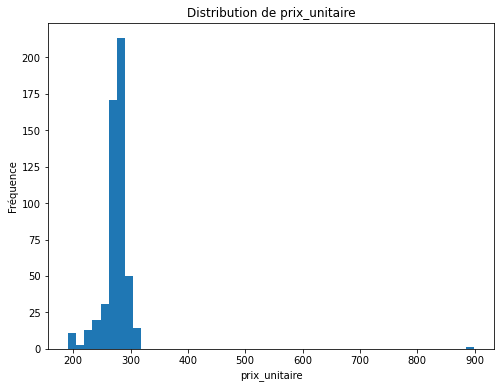

In [26]:
# Tracer l'histogramme pour prix_unitaire
plt.figure(figsize=(8, 6))
plt.hist(df3['prix_unitaire'], bins=50)
plt.xlabel('prix_unitaire')
plt.ylabel('Fréquence')
plt.title('Distribution de prix_unitaire')
plt.show()

Le prix unitaire maximum est de 899, ce qui est élevé par rapport à la distribution générale des prix. 

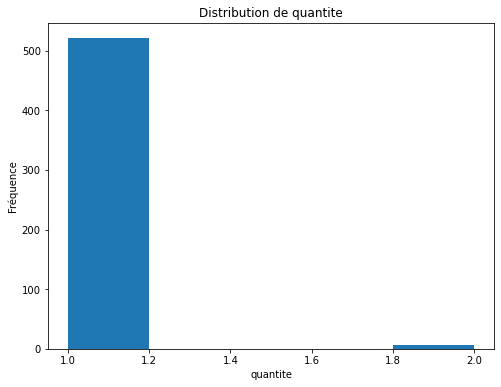

In [27]:
# Tracer l'histogramme pour quantite
plt.figure(figsize=(8, 6))
plt.hist(df3['quantite'], bins=5)
plt.xlabel('quantite')
plt.ylabel('Fréquence')
plt.title('Distribution de quantite')
plt.show()

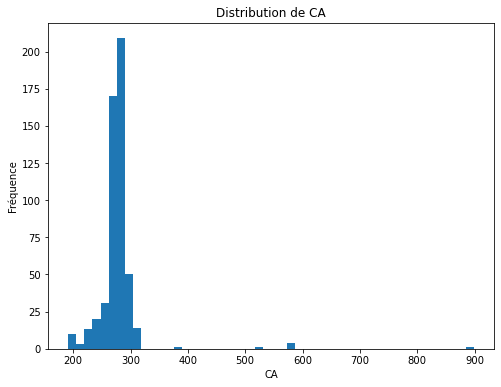

In [28]:
# Tracer l'histogramme pour CA
plt.figure(figsize=(8, 6))
plt.hist(df3['CA'], bins=50)
plt.xlabel('CA')
plt.ylabel('Fréquence')
plt.title('Distribution de CA')
plt.show()

Distribution des variables : En examinant les histogrammes des variables "commande_id", "prix_unitaire", "quantite" et "CA", nous pouvons observer la distribution des valeurs pour chaque variable. Par exemple, la plupart des valeurs de "quantite" sont proches de 1, ce qui indique que la majorité des commandes ont une quantité de 1. La distribution des valeurs de "CA" semble être symétrique et centrée autour de 278. Cependant, le prix unitaire maximum est de 899, ce qui est élevé par rapport à la distribution générale des prix.

In [29]:
# Déterminer les seuils pour les valeurs aberrantes (par exemple, +/- 3 fois l'écart type)
mean_price = df3['prix_unitaire'].mean()
std_price = df3['prix_unitaire'].std()
upper_threshold = mean_price + 3 * std_price
lower_threshold = mean_price - 3 * std_price

# Appliquer le filtre pour exclure les valeurs aberrantes
df5 = df3[(df3['prix_unitaire'] >= lower_threshold) & (df3['prix_unitaire'] <= upper_threshold)]
df5

,commande_id,date_de_commande,detaillant,taille,prix_unitaire,quantite,CA,date,heure
0,1,2022-06-01 16:05:00,708,2XL,298,1,298,2022-06-01,16:05:00
1,1,2022-06-01 16:05:00,89,2XL,258,1,258,2022-06-01,16:05:00
2,2,2022-06-10 17:03:00,bobo,One Size,228,1,228,2022-06-10,17:03:00
3,3,2022-06-10 19:59:00,799,XL,264,1,264,2022-06-10,19:59:00
4,4,2022-06-11 11:42:00,799,M,264,1,264,2022-06-11,11:42:00
...,...,...,...,...,...,...,...,...,...
522,171,2022-09-09 06:27:00,799,M,265,1,265,2022-09-09,06:27:00
523,172,2022-09-09 07:18:00,708,4XL,278,1,278,2022-09-09,07:18:00
524,173,2022-09-09 07:22:00,799,M,265,1,265,2022-09-09,07:22:00
525,174,2022-09-09 08:25:00,799,L,265,1,265,2022-09-09,08:25:00


Ce code calcule la moyenne et l'écart type de la colonne "prix_unitaire" dans "df4", puis définit des seuils pour les valeurs aberrantes en ajoutant et en soustrayant 3 fois l'écart type à la moyenne. Ensuite, le filtre est appliqué en utilisant les opérateurs logiques & (et) pour exclure les lignes où "prix_unitaire" est en dehors de ces seuils. Le DataFrame est alors mis à jour pour exclure les lignes avec des valeurs aberrantes dans la colonne "prix_unitaire".

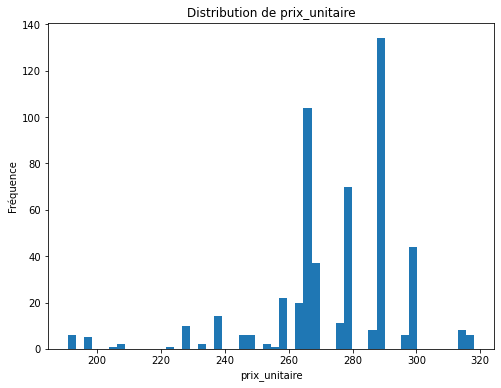

In [30]:
# Tracer l'histogramme pour prix_unitaire pour vérifier la mise à jour
plt.figure(figsize=(8, 6))
plt.hist(df5['prix_unitaire'], bins=50)
plt.xlabel('prix_unitaire')
plt.ylabel('Fréquence')
plt.title('Distribution de prix_unitaire')
plt.show()

In [31]:
# Utiliser la méthode unique pour obtenir les valeurs distinctes dans la colonne "detaillant"
df5["detaillant"].nunique()

24

In [32]:
# Utiliser la méthode factorize pour attribuer un identifiant unique à chaque valeur distincte
labels, uniques = pd.factorize(df5["detaillant"])

# Ajouter 1 à chaque identifiant pour les renommer
labels = labels + 1

# Mettre à jour la colonne "detaillant" avec les nouveaux identifiants
df6 = df5["detaillant"] = labels

# Afficher le DataFrame mis à jour
df5

,commande_id,date_de_commande,detaillant,taille,prix_unitaire,quantite,CA,date,heure
0,1,2022-06-01 16:05:00,1,2XL,298,1,298,2022-06-01,16:05:00
1,1,2022-06-01 16:05:00,2,2XL,258,1,258,2022-06-01,16:05:00
2,2,2022-06-10 17:03:00,3,One Size,228,1,228,2022-06-10,17:03:00
3,3,2022-06-10 19:59:00,4,XL,264,1,264,2022-06-10,19:59:00
4,4,2022-06-11 11:42:00,4,M,264,1,264,2022-06-11,11:42:00
...,...,...,...,...,...,...,...,...,...
522,171,2022-09-09 06:27:00,4,M,265,1,265,2022-09-09,06:27:00
523,172,2022-09-09 07:18:00,1,4XL,278,1,278,2022-09-09,07:18:00
524,173,2022-09-09 07:22:00,4,M,265,1,265,2022-09-09,07:22:00
525,174,2022-09-09 08:25:00,4,L,265,1,265,2022-09-09,08:25:00


In [33]:
# Utiliser la méthode unique pour reverifier les valeurs distinctes dans la colonne "detaillant"
df5["detaillant"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

### 3. Prédiction des ventes
Développer un modèle de prévision des ventes en utilisant les données de chiffre d'affaires (CA) et la date.

In [34]:
# Extraire les caractéristiques de la date pour la modélisation
df6 = df5
df6

,commande_id,date_de_commande,detaillant,taille,prix_unitaire,quantite,CA,date,heure
0,1,2022-06-01 16:05:00,1,2XL,298,1,298,2022-06-01,16:05:00
1,1,2022-06-01 16:05:00,2,2XL,258,1,258,2022-06-01,16:05:00
2,2,2022-06-10 17:03:00,3,One Size,228,1,228,2022-06-10,17:03:00
3,3,2022-06-10 19:59:00,4,XL,264,1,264,2022-06-10,19:59:00
4,4,2022-06-11 11:42:00,4,M,264,1,264,2022-06-11,11:42:00
...,...,...,...,...,...,...,...,...,...
522,171,2022-09-09 06:27:00,4,M,265,1,265,2022-09-09,06:27:00
523,172,2022-09-09 07:18:00,1,4XL,278,1,278,2022-09-09,07:18:00
524,173,2022-09-09 07:22:00,4,M,265,1,265,2022-09-09,07:22:00
525,174,2022-09-09 08:25:00,4,L,265,1,265,2022-09-09,08:25:00


In [35]:
# Convertir la colonne 'date' en type 'datetime'
df6['date'] = pd.to_datetime(df6['date'])
df6['annee'] = df6['date'].dt.year
df6['mois'] = df6['date'].dt.month
df6['jour'] = df6['date'].dt.day
df6['jour_semaine'] = df6['date'].dt.dayofweek
df6['jour_annee'] = df6['date'].dt.dayofyear
df6

,commande_id,date_de_commande,detaillant,taille,prix_unitaire,quantite,CA,date,heure,annee,mois,jour,jour_semaine,jour_annee
0,1,2022-06-01 16:05:00,1,2XL,298,1,298,2022-06-01,16:05:00,2022,6,1,2,152
1,1,2022-06-01 16:05:00,2,2XL,258,1,258,2022-06-01,16:05:00,2022,6,1,2,152
2,2,2022-06-10 17:03:00,3,One Size,228,1,228,2022-06-10,17:03:00,2022,6,10,4,161
3,3,2022-06-10 19:59:00,4,XL,264,1,264,2022-06-10,19:59:00,2022,6,10,4,161
4,4,2022-06-11 11:42:00,4,M,264,1,264,2022-06-11,11:42:00,2022,6,11,5,162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,171,2022-09-09 06:27:00,4,M,265,1,265,2022-09-09,06:27:00,2022,9,9,4,252
523,172,2022-09-09 07:18:00,1,4XL,278,1,278,2022-09-09,07:18:00,2022,9,9,4,252
524,173,2022-09-09 07:22:00,4,M,265,1,265,2022-09-09,07:22:00,2022,9,9,4,252
525,174,2022-09-09 08:25:00,4,L,265,1,265,2022-09-09,08:25:00,2022,9,9,4,252


In [36]:
# Diviser les données en ensemble d'entraînement et ensemble de test
X = df6[['annee', 'mois']]
y = df6['CA']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer et entraîner le modèle de régression linéaire
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Faire des prédictions sur l'ensemble de test
y_pred = regression_model.predict(X_test)

In [ ]:
# Calculer la racine carrée de l'erreur quadratique moyenne (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: ", rmse)

RMSE:  30.22372196380697


In [259]:
df5.to_csv('df5.csv', index=False)